Createing a K-means clustering algorithm to group customers of a retail store based on their purchase history:

Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

C:\Users\HP\AppData\Local\Temp\ipykernel_12964\3068967863.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = le.fit_transform(customer_data['Gender'])
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870:

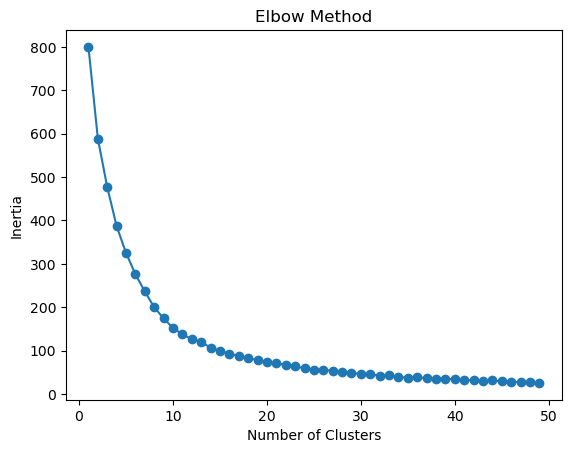

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     CustomerID  Cluster
0             1        4
1             2        4
2             3        5
3             4       11
4             5        5
..          ...      ...
195         196        0
196         197        7
197         198        3
198         199        8
199         200        3

[200 rows x 2 columns]
Silhouette Score: 0.42959528302241146


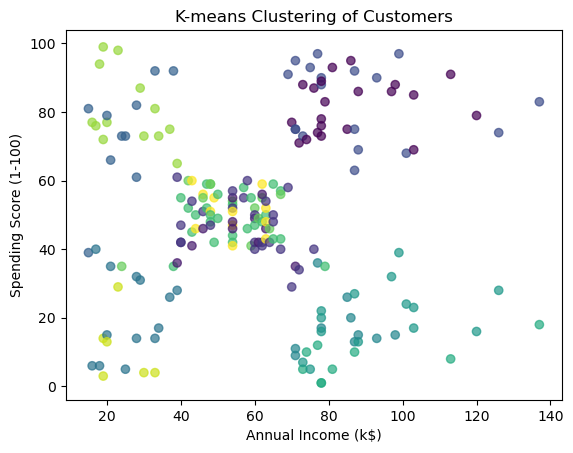

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# Loading training data
customer_data = pd.read_csv('C:/Users/HP/Downloads/Mall_Customers.csv')


# Selecting relevant features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Extracting features for clustering
X = customer_data[features]

# Encoding categorical variable 'Gender'
le = LabelEncoder()
X['Gender'] = le.fit_transform(customer_data['Gender'])

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using the Elbow Method
inertia_values = []
for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 50), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Based on the Elbow Method, choosing the optimal number of clusters (k)
optimal_k = 14  # The rate of decrease in inertia sharply changes at 14.

# Applying K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Displaying the cluster assignments
print(customer_data[['CustomerID', 'Cluster']])

# Evaluating the clustering using silhouette score
silhouette_avg = silhouette_score(X_scaled, customer_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualizing the clusters based on 'Annual Income' and 'Spending Score'
plt.scatter(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'], c=customer_data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.show()


So, the high value of k already shows that the k means clustering is not very suitable for this data which is directly signified by the moderately low silhoutte score of 0.43.